In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.interpolate import interp1d
from scipy.signal import resample
from scipy import stats
from sklearn.manifold import TSNE

In [2]:
data_path = '/content/drive/MyDrive/TFM/WESAD/'
ids = [2,3,4,5,6,7,8,9,10,11,13,14,15,16,17]
for i in ids:
    print(data_path + 'S' + str(i) + '/S' + str(i) + '.pkl')

/content/drive/MyDrive/TFM/WESAD/S2/S2.pkl
/content/drive/MyDrive/TFM/WESAD/S3/S3.pkl
/content/drive/MyDrive/TFM/WESAD/S4/S4.pkl
/content/drive/MyDrive/TFM/WESAD/S5/S5.pkl
/content/drive/MyDrive/TFM/WESAD/S6/S6.pkl
/content/drive/MyDrive/TFM/WESAD/S7/S7.pkl
/content/drive/MyDrive/TFM/WESAD/S8/S8.pkl
/content/drive/MyDrive/TFM/WESAD/S9/S9.pkl
/content/drive/MyDrive/TFM/WESAD/S10/S10.pkl
/content/drive/MyDrive/TFM/WESAD/S11/S11.pkl
/content/drive/MyDrive/TFM/WESAD/S13/S13.pkl
/content/drive/MyDrive/TFM/WESAD/S14/S14.pkl
/content/drive/MyDrive/TFM/WESAD/S15/S15.pkl
/content/drive/MyDrive/TFM/WESAD/S16/S16.pkl
/content/drive/MyDrive/TFM/WESAD/S17/S17.pkl


In [3]:
df_s2 = pd.read_pickle((data_path + "S2/S2.pkl"))

In [4]:
df_s2

{'signal': {'chest': {'ACC': array([[ 0.95539999, -0.222     , -0.55799997],
          [ 0.92579997, -0.2216    , -0.55379999],
          [ 0.90820003, -0.21960002, -0.53920001],
          ...,
          [ 0.87179995, -0.12379998, -0.30419999],
          [ 0.87300003, -0.12339997, -0.30260003],
          [ 0.87020004, -0.12199998, -0.30220002]]),
   'ECG': array([[ 0.02142334],
          [ 0.02032471],
          [ 0.01652527],
          ...,
          [-0.00544739],
          [ 0.00013733],
          [ 0.0040741 ]]),
   'EMG': array([[-0.00444031],
          [ 0.00434875],
          [ 0.00517273],
          ...,
          [-0.01716614],
          [-0.02897644],
          [-0.02357483]]),
   'EDA': array([[5.25054932],
          [5.26733398],
          [5.24330139],
          ...,
          [0.36048889],
          [0.36582947],
          [0.365448  ]]),
   'Temp': array([[30.120758],
          [30.129517],
          [30.138214],
          ...,
          [31.459229],
          [31.484283

In [9]:
df_acc_x = pd.DataFrame(df_s2["signal"]["chest"]["ACC"])[0]
df_acc_y = pd.DataFrame(df_s2["signal"]["chest"]["ACC"])[1]
df_acc_z = pd.DataFrame(df_s2["signal"]["chest"]["ACC"])[2]
df_ecg = pd.DataFrame(df_s2["signal"]["chest"]["ECG"])
df_emg = pd.DataFrame(df_s2["signal"]["chest"]["EMG"])
df_eda = pd.DataFrame(df_s2["signal"]["chest"]["EDA"])
df_temp = pd.DataFrame(df_s2["signal"]["chest"]["Temp"])
df_resp = pd.DataFrame(df_s2["signal"]["chest"]["Resp"])
df_label = pd.DataFrame(df_s2["label"])

df_chest = pd.concat([df_acc_x, df_acc_y, df_acc_z, df_ecg, df_emg, df_eda, df_temp, df_resp, df_label], axis=1)
df_chest.columns = ['ACC_x', 'ACC_y', 'ACC_z', 'ECG', 'EMG', 'EDA', 'TEMP', 'RESP', 'label']

df_chest.describe()

,ACC_x,ACC_y,ACC_z,ECG,EMG,EDA,TEMP,RESP,label
count,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06
mean,7.538656e-01,-1.331884e-01,-4.226812e-01,1.212245e-03,-2.412918e-03,1.528387e+00,3.087667e+01,5.490614e-02,1.212370e+00
std,1.751162e-01,6.417297e-02,3.002357e-01,1.540773e-01,1.165187e-02,1.238425e+00,1.281106e+00,2.917749e+00,1.606596e+00
min,2.150000e-01,-6.600000e-01,-1.135400e+00,-1.499542e+00,-4.149628e-01,2.632141e-01,2.804526e+01,-2.790375e+01,0.000000e+00
25%,6.210001e-01,-1.498000e-01,-7.172000e-01,-6.797791e-02,-8.331299e-03,7.995605e-01,3.057495e+01,-1.481628e+00,0.000000e+00
50%,8.568000e-01,-1.256000e-01,-3.222000e-01,8.239746e-03,-1.602173e-03,1.163101e+00,3.128992e+01,-1.571655e-01,0.000000e+00
75%,8.922000e-01,-9.579998e-02,-2.098000e-01,4.435730e-02,3.982544e-03,1.546478e+00,3.181512e+01,1.618958e+00,2.000000e+00
max,2.029800e+00,5.390000e-01,1.246800e+00,1.499313e+00,3.009796e-01,7.576752e+00,3.437039e+01,2.737885e+01,7.000000e+00


In [8]:
df_chest.dtypes

ACC_x    float64
ACC_y    float64
ACC_z    float64
ECG      float64
EMG      float64
EDA      float64
TEMP     float32
RESP     float64
label      int32
dtype: object

In [23]:
df_chest.isnull().sum()

ACC_x    0
ACC_y    0
ACC_z    0
ECG      0
EMG      0
EDA      0
TEMP     0
RESP     0
label    0
dtype: int64

Text(0.5, 1.0, 'Distribución de los estados afectivos del participante S2')

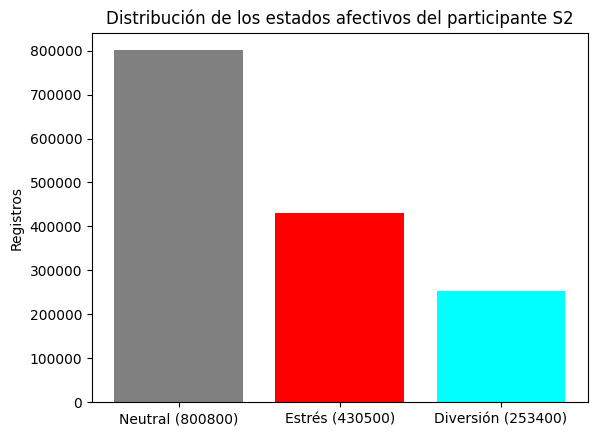

In [33]:
# crear un gráfico de barras:
counts = [df_chest["label"].value_counts()[1], df_chest["label"].value_counts()[2], df_chest["label"].value_counts()[3]]
place = np.arange(len(counts))
plt.bar(place, counts, color=('gray', 'red', 'cyan'))

# poner nombre a cada barra
plt.xticks(place, ('Neutral ('+str(df_chest["label"].value_counts()[1])+')',
                   'Estrés ('+str(df_chest["label"].value_counts()[2])+')',
                   'Diversión ('+str(df_chest["label"].value_counts()[3])+')'))
plt.ylabel('Registros')
plt.title('Distribución de los estados afectivos del participante S2')

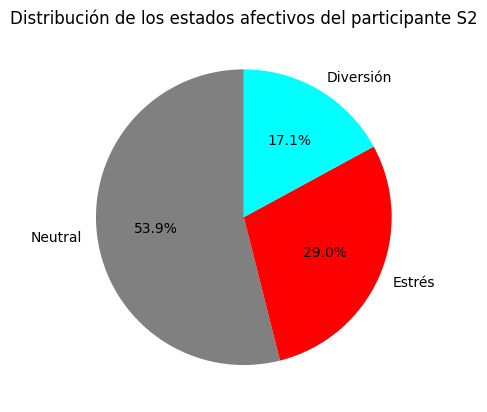

In [46]:
df_chest_filt = df_chest[df_chest['label'].isin([1, 2, 3])].copy()
df_chest_filt.loc[:, 'label']  = df_chest_filt['label'].replace({1: 'Neutral', 2: 'Estrés', 3: 'Diversión'})
percentage_counts = df_chest_filt["label"].value_counts(normalize=True) * 100
colors = ('gray', 'red', 'cyan')
plt.pie(percentage_counts, labels=percentage_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribución de los estados afectivos del participante S2')
plt.show()

In [10]:
# mostrar la correlación entre las variables númericas
df_num = df_chest.drop(['label'], axis=1)
corr_chest = df_num.corr()
corr_chest.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-10-76f5c7b95749>:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_chest.style.background_gradient(cmap='coolwarm').set_precision(2)


,ACC_x,ACC_y,ACC_z,ECG,EMG,EDA,TEMP,RESP
ACC_x,1.00,0.36,0.91,0.01,0.00,0.13,0.15,0.00
ACC_y,0.36,1.00,0.22,-0.01,-0.00,0.10,-0.37,-0.02
ACC_z,0.91,0.22,1.00,-0.00,0.00,0.00,0.29,0.02
ECG,0.01,-0.01,-0.00,1.00,-0.08,0.00,0.00,0.03
EMG,0.00,-0.00,0.00,-0.08,1.00,-0.01,0.01,-0.00
EDA,0.13,0.10,0.00,0.00,-0.01,1.00,-0.55,-0.00
TEMP,0.15,-0.37,0.29,0.00,0.01,-0.55,1.00,0.00
RESP,0.00,-0.02,0.02,0.03,-0.00,-0.00,0.00,1.00


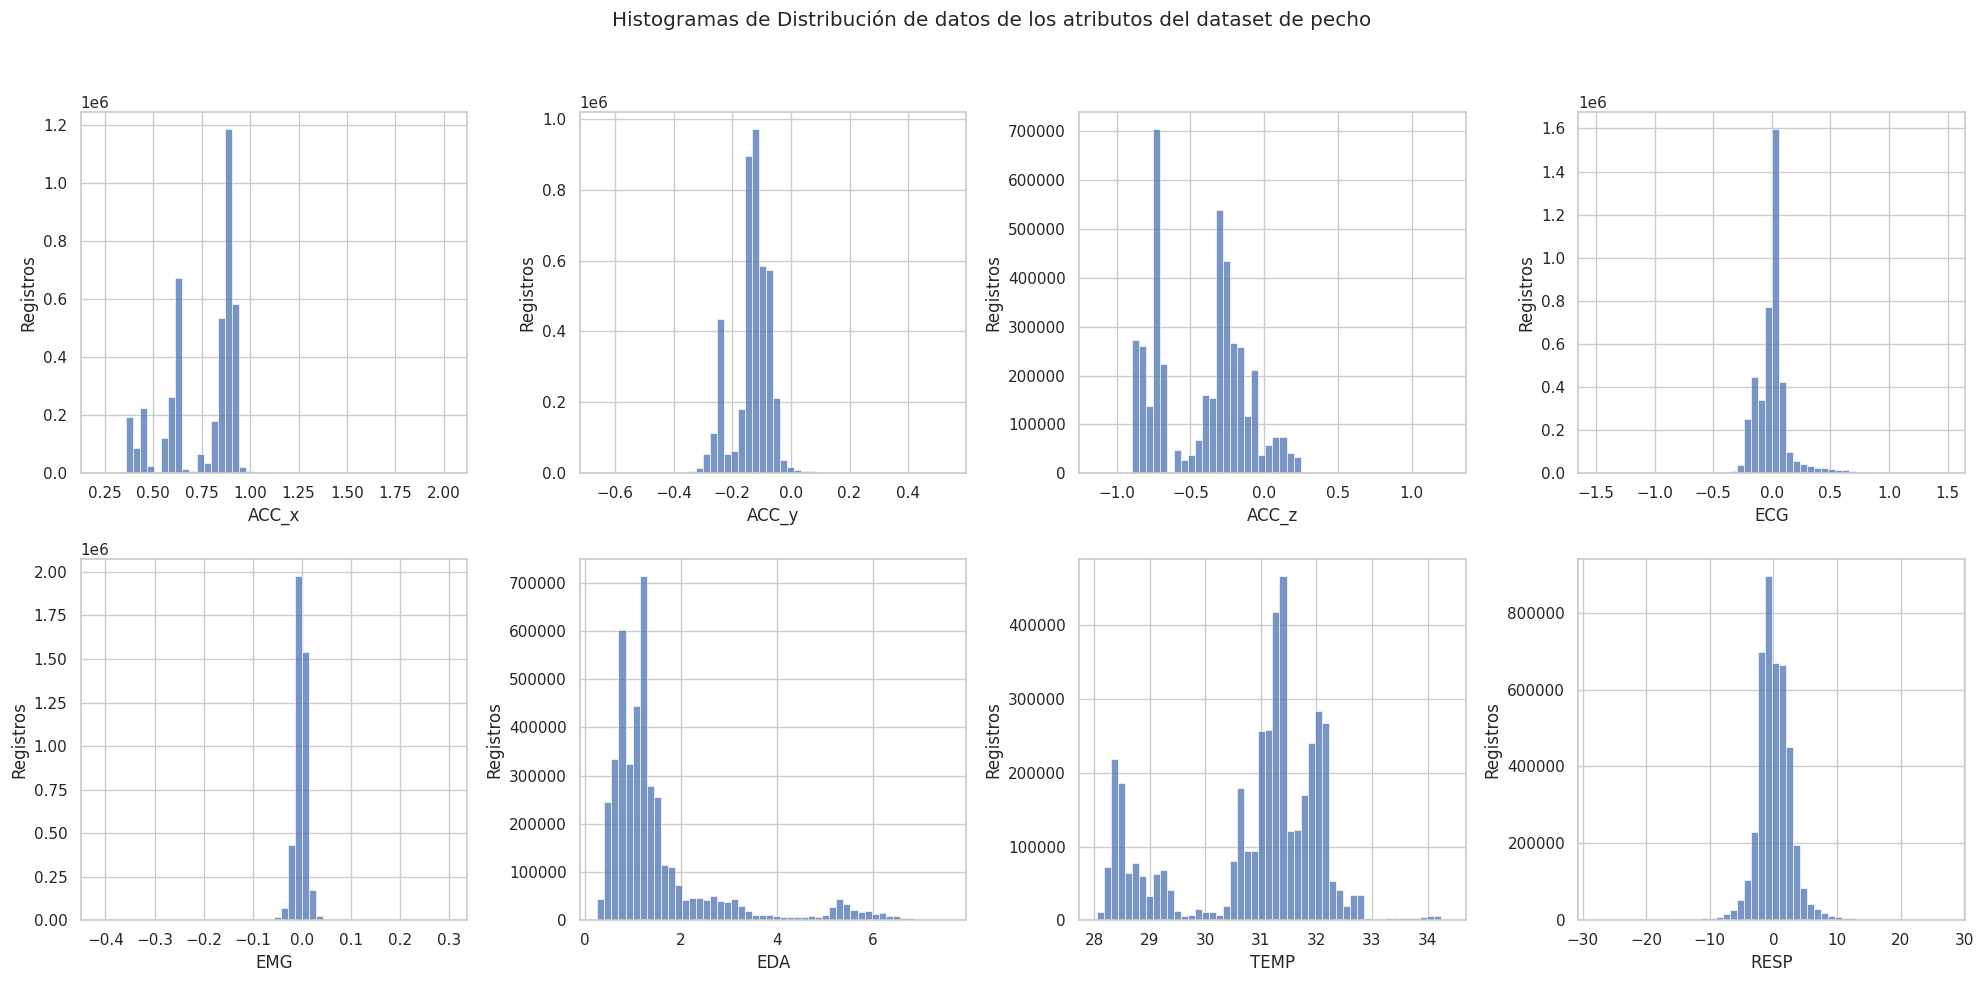

In [15]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.suptitle('Histogramas de Distribución de datos de los atributos del dataset de pecho')

for i, column in enumerate(df_num.columns):
    sns.histplot(df_num[column], bins=50, kde=False, ax=axes[i//4, i%4])
    #axes[i//4, i%4].set_title(column)
    axes[i//4, i%4].set_ylabel('Registros')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

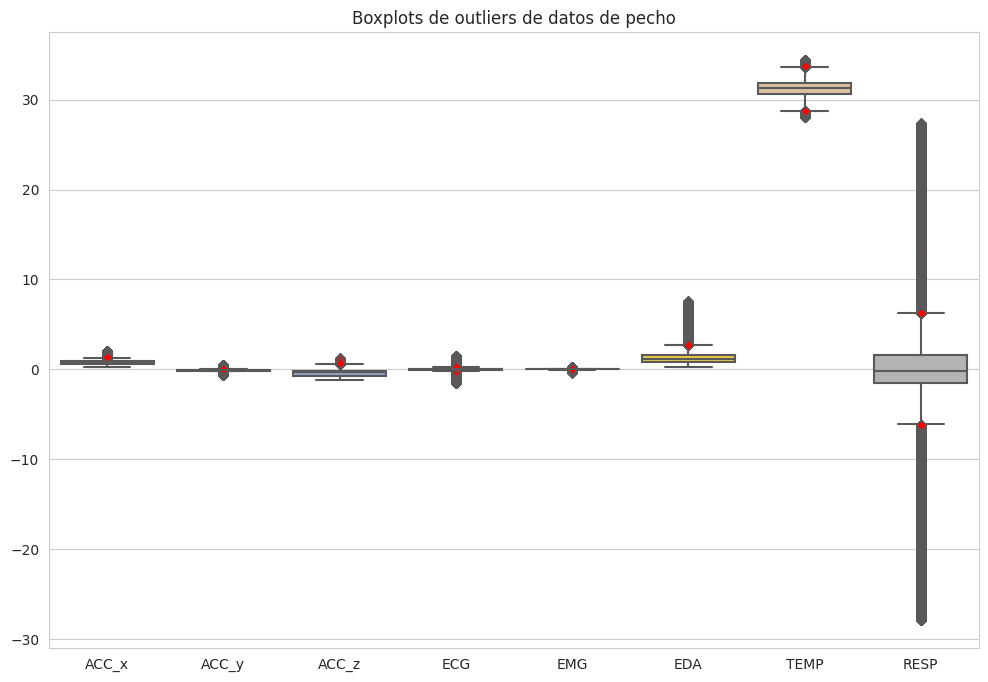

In [55]:
# comprobar outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_num, palette='Set2', orient='v', flierprops=dict(markerfacecolor='r', marker='D'))

plt.title('Boxplots de outliers de datos de pecho')

plt.show()

In [24]:
z_scores = np.abs((df_num - df_num.mean()) / df_num.std())
threshold = 3
outliers_count = (z_scores > threshold).sum()
print("Cantidad de outliers en cada columna:\n", outliers_count)

Cantidad de outliers en cada columna:
 ACC_x      3220
ACC_y     29414
ACC_z      2964
ECG      102518
EMG       66044
EDA      192777
TEMP          0
RESP      72859
dtype: int64


In [4]:
df_w_acc_x = pd.DataFrame(df_s2["signal"]["wrist"]["ACC"])[0]
df_w_acc_y = pd.DataFrame(df_s2["signal"]["wrist"]["ACC"])[1]
df_w_acc_z = pd.DataFrame(df_s2["signal"]["wrist"]["ACC"])[2]
df_w_bvp = pd.DataFrame(df_s2["signal"]["wrist"]["BVP"])
df_w_eda = pd.DataFrame(df_s2["signal"]["wrist"]["EDA"])
df_w_temp = pd.DataFrame(df_s2["signal"]["wrist"]["TEMP"])

df_w_acc = pd.concat([df_w_acc_x, df_w_acc_y, df_w_acc_z], axis=1)

In [20]:
df_w_acc.describe()

,0,1,2
count,194528.000000,194528.000000,194528.000000
mean,39.701452,-0.407381,18.990526
std,19.520898,33.206671,25.003502
min,-128.000000,-128.000000,-128.000000
25%,21.000000,-12.000000,9.000000
50%,44.000000,5.000000,17.000000
75%,57.000000,23.000000,37.000000
max,127.000000,104.000000,127.000000


In [25]:
df_w_acc.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [21]:
df_w_bvp.describe()

,0
count,389056.000000
mean,-0.000427
std,75.871334
min,-873.670000
25%,-19.670000
50%,3.010000
75%,19.032500
max,988.080000


In [26]:
df_w_bvp.isnull().sum()

0    0
dtype: int64

In [13]:
df_w_eda.describe()

,0
count,24316.000000
mean,0.391743
std,0.329236
min,0.045113
25%,0.169403
50%,0.236032
75%,0.520487
max,1.717419


In [27]:
df_w_eda.isnull().sum()

0    0
dtype: int64

In [22]:
df_w_temp.describe()

,0
count,24316.000000
mean,34.386945
std,1.045340
min,32.310000
25%,33.680000
50%,34.250000
75%,35.410000
max,35.970000


In [28]:
df_w_temp.isnull().sum()

0    0
dtype: int64

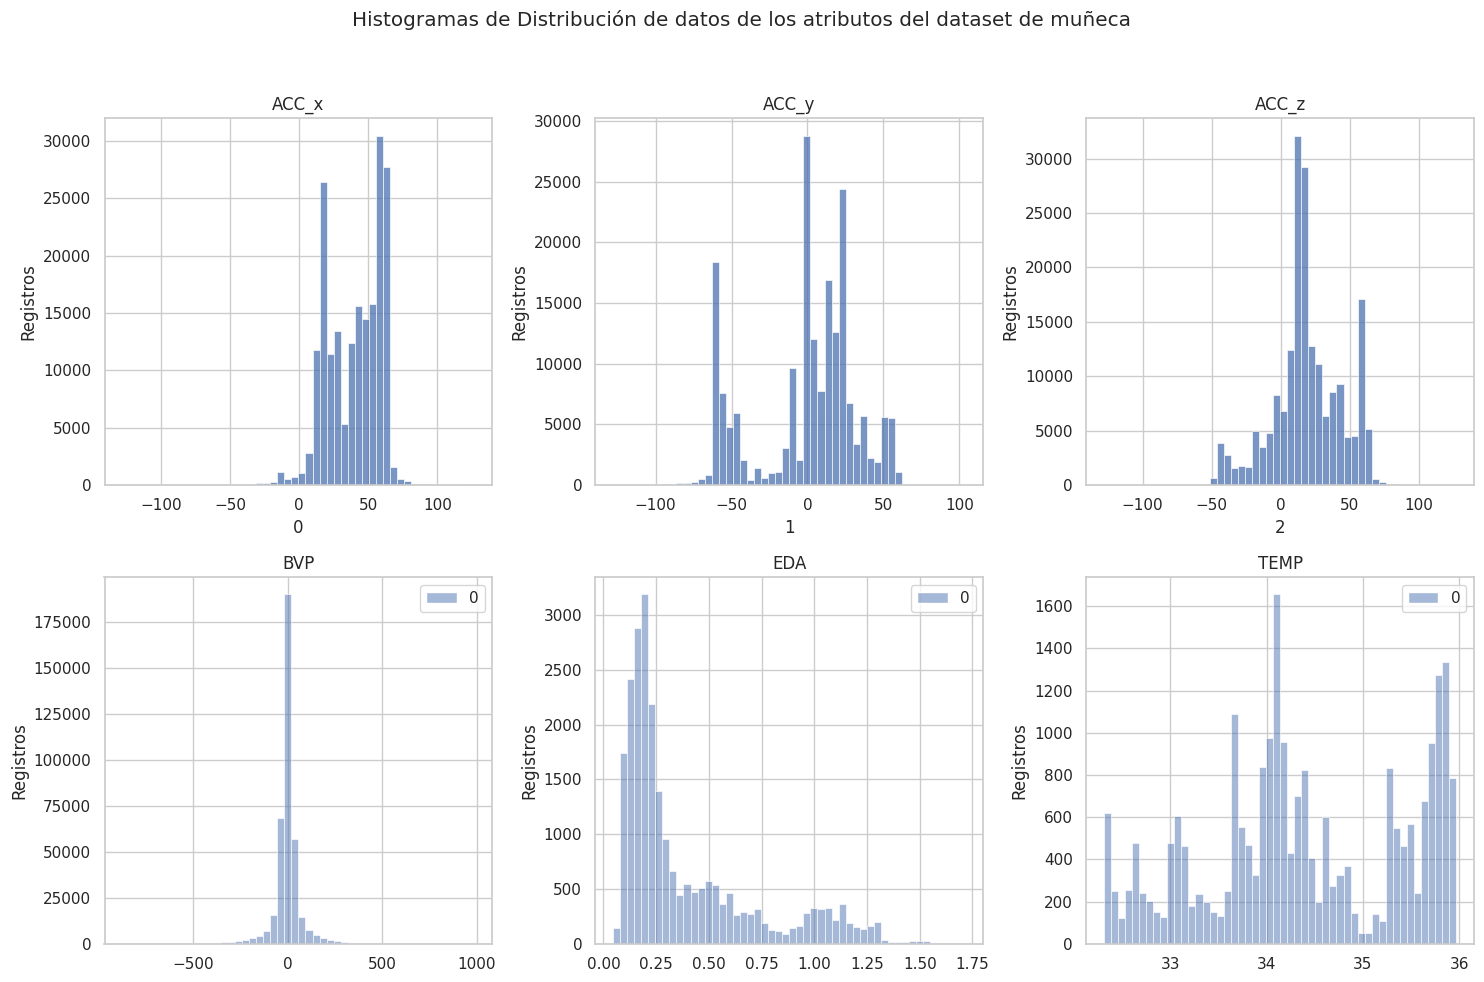

In [14]:

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Histogramas de Distribución de datos de los atributos del dataset de muñeca')

sns.histplot(df_w_acc_x, bins=50, kde=False, ax=axes[0, 0])
axes[0, 0].set_title('ACC_x')
axes[0, 0].set_ylabel('Registros')

sns.histplot(df_w_acc_y, bins=50, kde=False, ax=axes[0, 1])
axes[0, 1].set_title('ACC_y')
axes[0, 1].set_ylabel('Registros')

sns.histplot(df_w_acc_z, bins=50, kde=False, ax=axes[0, 2])
axes[0, 2].set_title('ACC_z')
axes[0, 2].set_ylabel('Registros')

sns.histplot(df_w_bvp, bins=50, kde=False, ax=axes[1, 0])
axes[1, 0].set_title('BVP')
axes[1, 0].set_ylabel('Registros')

sns.histplot(df_w_eda, bins=50, kde=False, ax=axes[1, 1])
axes[1, 1].set_title('EDA')
axes[1, 1].set_ylabel('Registros')

sns.histplot(df_w_temp, bins=50, kde=False, ax=axes[1, 2])
axes[1, 2].set_title('TEMP')
axes[1, 2].set_ylabel('Registros')

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


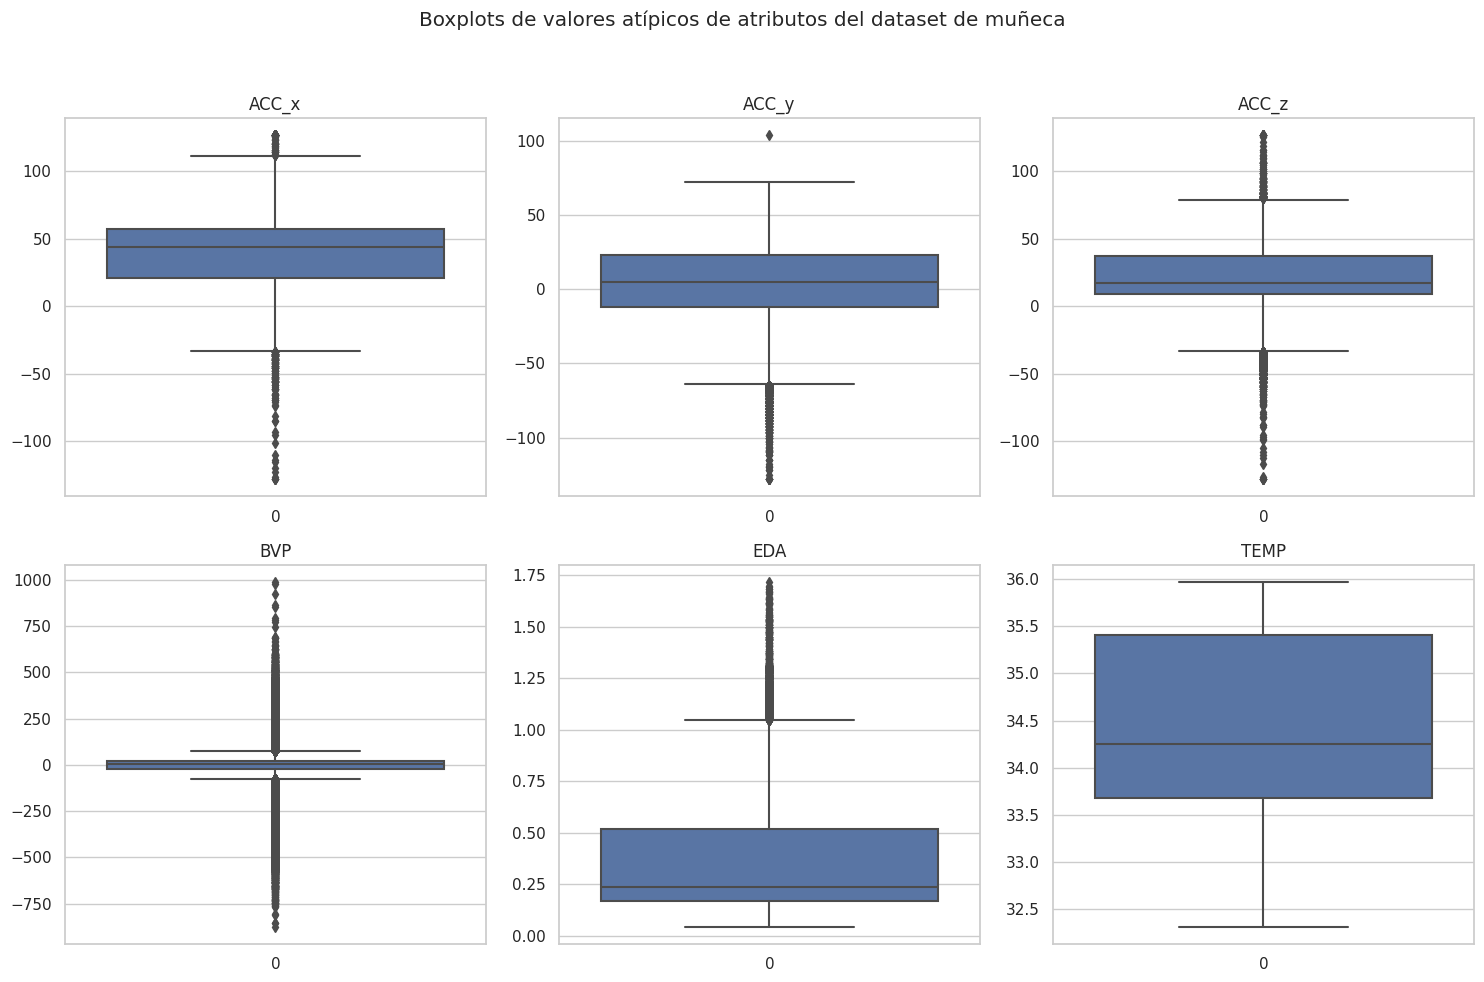

In [22]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Boxplots de valores atípicos de atributos del dataset de muñeca')

sns.boxplot(data=df_w_acc_x, ax=axes[0, 0])
axes[0, 0].set_title('ACC_x')

sns.boxplot(data=df_w_acc_y, ax=axes[0, 1])
axes[0, 1].set_title('ACC_y')

sns.boxplot(data=df_w_acc_z, ax=axes[0, 2])
axes[0, 2].set_title('ACC_z')

sns.boxplot(data=df_w_bvp, ax=axes[1, 0])
axes[1, 0].set_title('BVP')

sns.boxplot(data=df_w_eda, ax=axes[1, 1])
axes[1, 1].set_title('EDA')

sns.boxplot(data=df_w_temp, ax=axes[1, 2])
axes[1, 2].set_title('TEMP')

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

In [65]:
z_scores_acc = np.abs((df_w_acc - df_w_acc.mean()) / df_w_acc.std())
z_scores_bvp = np.abs((df_w_bvp - df_w_bvp.mean()) / df_w_bvp.std())
z_scores_eda = np.abs((df_w_eda - df_w_eda.mean()) / df_w_eda.std())
z_scores_temp = np.abs((df_w_temp - df_w_temp.mean()) / df_w_temp.std())
threshold = 3
outliers_count_acc = (z_scores_acc > threshold).sum()
outliers_count_bvp = int((z_scores_bvp > threshold).sum())
outliers_count_eda = int((z_scores_eda > threshold).sum())
outliers_count_temp = int((z_scores_temp > threshold).sum())

dict_outliers = {'ACC_x': outliers_count_acc[0], 'ACC_y': outliers_count_acc[1], 'ACC_z': outliers_count_acc[2],
                 'BVP': outliers_count_bvp, 'EDA': outliers_count_eda, 'TEMP': outliers_count_temp}
print(dict_outliers)
perc = 701/194528
perc

{'ACC_x': 701, 'ACC_y': 41, 'ACC_z': 139, 'BVP': 10644, 'EDA': 139, 'TEMP': 0}


0.003603594341174535